In [2]:
import sys
import os 

os.environ["CONFIG_PATHS"] = "../../configs/small_model.yaml"
os.environ["CONFIG_OVERRIDES"] = 'game.moves_directory="../../data/moves_10"'
sys.path.append("../../src")

import matplotlib.pyplot as plt

from analysis import load_events, filter_events

In [3]:
events = load_events("../../data/2024-11-19_08-38-28-extracted/logs_11_53.txt")

Start time: 1732087935.3104022


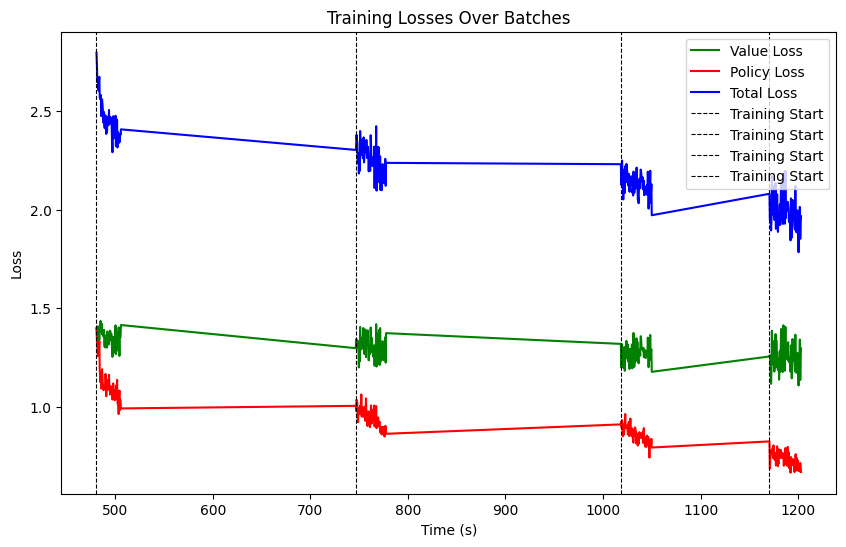

In [12]:
training_batches = filter_events(events, "training_batch")

timestamps = [e.timestamp for e in training_batches]
value_losses = [e[2]["value_loss"] for e in training_batches]
policy_losses = [e[2]["policy_loss"] for e in training_batches]
total_losses = [e[2]["loss"] for e in training_batches]

training_start_times = [e[0] for e in events if e[1] == "training_start"]

plt.figure(figsize=(10, 6))

plt.plot(timestamps, value_losses, label='Value Loss', color='g')
plt.plot(timestamps, policy_losses, label='Policy Loss', color='r')
plt.plot(timestamps, total_losses, label='Total Loss', color='b')

for start_time in training_start_times:
    plt.axvline(x=start_time, color='k', linestyle='--', linewidth=0.8, label='Training Start')

plt.xlabel('Time (s)')
plt.ylabel('Loss')
plt.title('Training Losses Over Batches')
plt.legend()
plt.show()


The plot below shows the number of samples in each training run. If this value is growing over time, and the time between each training run is also growing, that's an indication that training is not able to keep up with the rate of self-play.

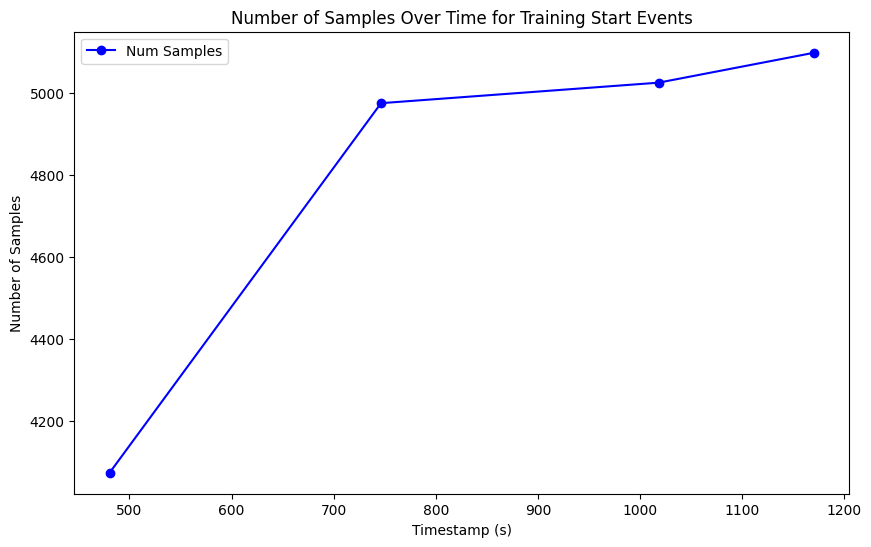

In [13]:
training_start_events = filter_events(events, "training_start")

num_samples = [e.params["num_samples"] for e in training_start_events]
timestamps = [e.timestamp for e in training_start_events]

plt.figure(figsize=(10, 6))
plt.plot(timestamps, num_samples, marker='o', linestyle='-', color='b', label='Num Samples')

plt.xlabel('Timestamp (s)')
plt.ylabel('Number of Samples')
plt.title('Number of Samples Over Time for Training Start Events')
plt.legend()
plt.show()